<a href="https://colab.research.google.com/github/doheeeeekim/Undergraduate_IndustrialDS/blob/main/%EC%82%B0%EC%97%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99_10%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%EC%84%A4%EB%AA%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##10주차 과제
>[과제] 부산항 미세먼지 데이터를 이용하여 MLP 모형을 만들고 과제 데이터를 이용하여 예측하기
>> - 실습용 데이터(100% 모두 사용 가능)로 모델링을 수행한 다음 과제용 데이터를 이용하여 예측을 수행할 것 
>> - 모델링을 위한 데이터는 변경 가능
>> - 네트워크 구조는 동일하게 사용해도 되며, 변경해도 가능
>> - 파라미터 및 기타 학습에 필요한 다양한 Function을 변경해도 됨
>> - 제출: 코드 링크 + 결과 스크린샷 또는 CSV파일

>**(예측 변수)** 부산항 북항 소재의 항만 근처의 미세먼지 관측소에서 측정된 초미세 먼지 데이터(PM2)

>**(입력 변수)** 동일 시점에서 각 항만에 입항한 선박의 엔진 배출 계수를 측정하여 시점별 총합을 기록한 데이터 및 동일 시점의 기상 데이터

총 20개의 엔진 타입이 존재

기상 데이터에는 풍향, 풍속, 습도, 온도 가 존재



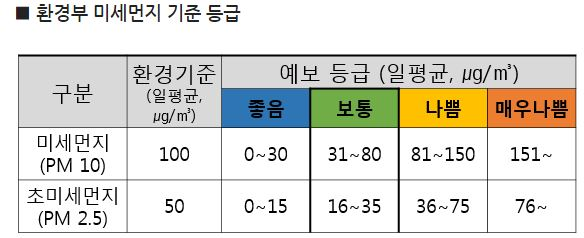

##데이터 전처리
> 예측 변수 처리: 수치형 > 범주형

> 풍향 변수 처리: 삼각함수를 이용하여 변경

> 데이터 정규화 수행

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
data_path = "/content/drive/My Drive/Colab Notebooks/Data" 
data_name = os.listdir(data_path)

dt = pd.read_csv(data_path + '/fine_dust.csv')
dt.head()

,PM,PM2,EG1,EG2,EG3,EG4,EG5,EG6,EG7,EG8,...,EG15,EG16,EG17,EG18,EG19,EG20,HUM,TMP,WD,WS
0,27.0,25.0,1305.26,15069.82,12815.28,2847.84,2847.84,1230.46,14206.22,12080.88,...,636.48,583.44,6736.08,5728.32,1272.96,1272.96,91,7.2,0.906308,0.6
1,52.0,17.0,1021.02,11788.14,10024.56,2227.68,2227.68,729.30,8420.10,7160.40,...,0.00,437.58,5052.06,4296.24,954.72,954.72,36,14.3,0.438371,1.3
2,22.0,12.0,867.68,10017.76,8519.04,1893.12,1893.12,1301.52,15026.64,12778.56,...,318.24,291.72,3368.04,2864.16,636.48,636.48,38,6.7,0.992546,0.5
3,23.0,13.0,729.30,8420.10,7160.40,1591.20,1591.20,729.30,8420.10,7160.40,...,0.00,145.86,1684.02,1432.08,318.24,318.24,23,9.7,0.241922,3.0
4,90.0,63.0,946.22,10924.54,9290.16,2064.48,2064.48,575.96,6649.72,5654.88,...,0.00,583.44,6736.08,5728.32,1272.96,1272.96,18,5.9,0.484810,1.3


In [ ]:
dt1= pd.read_csv(data_path + '/fine_dust_without_y.csv')
dt1.head()

,EG1,EG2,EG3,EG4,EG5,EG6,EG7,EG8,EG9,EG10,...,EG15,EG16,EG17,EG18,EG19,EG20,HUM,TMP,WD,WS
0,583.44,6736.08,5728.32,1272.96,1272.96,583.44,6736.08,5728.32,1272.96,1272.96,...,954.72,437.58,5052.06,4296.24,954.72,954.72,68,23.7,0.882948,0.7
1,875.16,10104.12,8592.48,1909.44,1909.44,1151.92,13299.44,11309.76,2513.28,2513.28,...,954.72,583.44,6736.08,5728.32,1272.96,1272.96,34,3.5,0.190809,3.5
2,729.30,8420.10,7160.40,1591.20,1591.20,1092.08,12608.56,10722.24,2382.72,2382.72,...,0.00,437.58,5052.06,4296.24,954.72,954.72,58,11.9,0.754710,0.6
3,875.16,10104.12,8592.48,1909.44,1909.44,1600.72,18481.04,15716.16,3492.48,3492.48,...,954.72,291.72,3368.04,2864.16,636.48,636.48,25,7.0,0.275637,1.9
4,1237.94,14292.58,12154.32,2700.96,2700.96,1806.42,20855.94,17735.76,3941.28,3941.28,...,636.48,1301.52,15026.64,12778.56,2839.68,2839.68,66,13.7,-0.173648,0.4


In [ ]:
# 미세먼지 등급 별로 구분
# PM2.5
idx0 = dt.loc[dt['PM2']<=15,:].index
idx1 = dt.loc[(dt['PM2']>=15) & (dt['PM2']<=35),:].index
idx2 = dt.loc[(dt['PM2']>=36),:].index


dt.iloc[idx0,1] = 0
dt.iloc[idx1,1] = 1
dt.iloc[idx2,1] = 2



dt['PM2'].value_counts()

1.0    1670
2.0    1033
0.0     725
Name: PM2, dtype: int64

In [ ]:
dt.head()

,PM,PM2,EG1,EG2,EG3,EG4,EG5,EG6,EG7,EG8,...,EG15,EG16,EG17,EG18,EG19,EG20,HUM,TMP,WD,WS
0,27.0,1.0,1305.26,15069.82,12815.28,2847.84,2847.84,1230.46,14206.22,12080.88,...,636.48,583.44,6736.08,5728.32,1272.96,1272.96,91,7.2,0.906308,0.6
1,52.0,1.0,1021.02,11788.14,10024.56,2227.68,2227.68,729.30,8420.10,7160.40,...,0.00,437.58,5052.06,4296.24,954.72,954.72,36,14.3,0.438371,1.3
2,22.0,0.0,867.68,10017.76,8519.04,1893.12,1893.12,1301.52,15026.64,12778.56,...,318.24,291.72,3368.04,2864.16,636.48,636.48,38,6.7,0.992546,0.5
3,23.0,0.0,729.30,8420.10,7160.40,1591.20,1591.20,729.30,8420.10,7160.40,...,0.00,145.86,1684.02,1432.08,318.24,318.24,23,9.7,0.241922,3.0
4,90.0,2.0,946.22,10924.54,9290.16,2064.48,2064.48,575.96,6649.72,5654.88,...,0.00,583.44,6736.08,5728.32,1272.96,1272.96,18,5.9,0.484810,1.3


In [ ]:
# 데이터 셋 분류
x = dt.iloc[:,2:]
pm2 = dt.iloc[:,1]

print(x.info())
print(pm2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428 entries, 0 to 3427
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EG1     3428 non-null   float64
 1   EG2     3428 non-null   float64
 2   EG3     3428 non-null   float64
 3   EG4     3428 non-null   float64
 4   EG5     3428 non-null   float64
 5   EG6     3428 non-null   float64
 6   EG7     3428 non-null   float64
 7   EG8     3428 non-null   float64
 8   EG9     3428 non-null   float64
 9   EG10    3428 non-null   float64
 10  EG11    3428 non-null   float64
 11  EG12    3428 non-null   float64
 12  EG13    3428 non-null   float64
 13  EG14    3428 non-null   float64
 14  EG15    3428 non-null   float64
 15  EG16    3428 non-null   float64
 16  EG17    3428 non-null   float64
 17  EG18    3428 non-null   float64
 18  EG19    3428 non-null   float64
 19  EG20    3428 non-null   float64
 20  HUM     3428 non-null   int64  
 21  TMP     3428 non-null   float64
 22  

In [ ]:
add_testx=dt1
print(add_testx.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EG1     100 non-null    float64
 1   EG2     100 non-null    float64
 2   EG3     100 non-null    float64
 3   EG4     100 non-null    float64
 4   EG5     100 non-null    float64
 5   EG6     100 non-null    float64
 6   EG7     100 non-null    float64
 7   EG8     100 non-null    float64
 8   EG9     100 non-null    float64
 9   EG10    100 non-null    float64
 10  EG11    100 non-null    float64
 11  EG12    100 non-null    float64
 12  EG13    100 non-null    float64
 13  EG14    100 non-null    float64
 14  EG15    100 non-null    float64
 15  EG16    100 non-null    float64
 16  EG17    100 non-null    float64
 17  EG18    100 non-null    float64
 18  EG19    100 non-null    float64
 19  EG20    100 non-null    float64
 20  HUM     100 non-null    int64  
 21  TMP     100 non-null    float64
 22  WD 

In [ ]:
#전처리를 위해 수업용데이터와 과제용데이터 합치기
sum_x= pd.concat([x, add_testx],axis=0)
sum_x

,EG1,EG2,EG3,EG4,EG5,EG6,EG7,EG8,EG9,EG10,...,EG15,EG16,EG17,EG18,EG19,EG20,HUM,TMP,WD,WS
0,1305.26,15069.82,12815.28,2847.84,2847.84,1230.46,14206.22,12080.88,2684.64,2684.64,...,636.48,583.44,6736.08,5728.32,1272.96,1272.96,91,7.2,0.906308,0.6
1,1021.02,11788.14,10024.56,2227.68,2227.68,729.30,8420.10,7160.40,1591.20,1591.20,...,0.00,437.58,5052.06,4296.24,954.72,954.72,36,14.3,0.438371,1.3
2,867.68,10017.76,8519.04,1893.12,1893.12,1301.52,15026.64,12778.56,2839.68,2839.68,...,318.24,291.72,3368.04,2864.16,636.48,636.48,38,6.7,0.992546,0.5
3,729.30,8420.10,7160.40,1591.20,1591.20,729.30,8420.10,7160.40,1591.20,1591.20,...,0.00,145.86,1684.02,1432.08,318.24,318.24,23,9.7,0.241922,3.0
4,946.22,10924.54,9290.16,2064.48,2064.48,575.96,6649.72,5654.88,1256.64,1256.64,...,0.00,583.44,6736.08,5728.32,1272.96,1272.96,18,5.9,0.484810,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1237.94,14292.58,12154.32,2700.96,2700.96,1806.42,20855.94,17735.76,3941.28,3941.28,...,636.48,1155.66,13342.62,11346.48,2521.44,2521.44,68,13.1,-0.997564,0.3
96,875.16,10104.12,8592.48,1909.44,1909.44,583.44,6736.08,5728.32,1272.96,1272.96,...,636.48,437.58,5052.06,4296.24,954.72,954.72,58,5.9,0.544639,2.0
97,1021.02,11788.14,10024.56,2227.68,2227.68,437.58,5052.06,4296.24,954.72,954.72,...,1574.88,0.00,0.00,0.00,0.00,0.00,48,8.4,0.515038,1.3
98,583.44,6736.08,5728.32,1272.96,1272.96,729.30,8420.10,7160.40,1591.20,1591.20,...,2195.04,654.50,7556.50,6426.00,1428.00,1428.00,51,2.8,0.374607,0.6


In [ ]:
#MinMaxscaling
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(sum_x)
sum_x = min_max_scaler.transform(sum_x)

In [ ]:
x=sum_x[:3428]
add_testx=sum_x[3428:]

In [ ]:
from sklearn.model_selection import train_test_split
pm2_trainx, pm2_testx, pm2_trainy, pm2_testy = train_test_split(x, pm2, test_size=0.3, random_state = 15)
print(len(pm2_trainx))
print(len(pm2_trainy))
print(len(pm2_testx))
print(len(pm2_testy))

2399
2399
1029
1029


##Multilayer Perceptron(MLP)
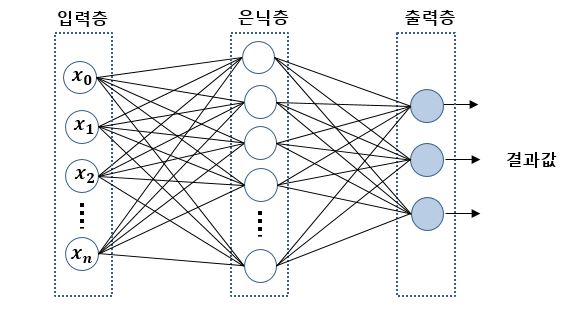

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
# 네트워크 구조 정의

class mlp(nn.Module):

    def __init__(self, input_size):
        super(mlp, self).__init__()
        self.input_size = input_size
        self.fc1 = nn.Linear(self.input_size,18)
        self.bn1 = torch.nn.BatchNorm1d(18)
        self.fc2 = nn.Linear(18,9)
        self.bn2 = torch.nn.BatchNorm1d(9)
        self.fc4 = nn.Linear(9,3)
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout()
        self.sf = torch.nn.Softmax()
    
    def forward(self, x):
        output = self.fc1(x)
        output = self.bn1(output)
        output = self.relu(output)
        output = self.dropout(output)
        output = self.fc2(output)
        output = self.bn2(output)
        output = self.relu(output)
        output = self.dropout(output)
        output = self.fc4(output)
        output = self.sf(output)
        return output

In [ ]:
# 입력 변수 torch tensor로 변경
pm2_trainx = torch.FloatTensor(pm2_trainx)
pm2_testx = torch.FloatTensor(pm2_testx)
print(pm2_trainx)

tensor([[0.3604, 0.3604, 0.3604,  ..., 0.4011, 0.5261, 0.2000],
        [0.4325, 0.4325, 0.4325,  ..., 0.3009, 0.6209, 0.6909],
        [0.2884, 0.2884, 0.2884,  ..., 0.6476, 0.5696, 0.2182],
        ...,
        [0.2163, 0.2163, 0.2163,  ..., 0.1748, 0.6545, 0.6545],
        [0.7172, 0.7172, 0.7172,  ..., 0.7221, 0.9532, 0.1091],
        [0.2847, 0.2847, 0.2847,  ..., 0.4097, 0.7796, 0.1818]])


In [ ]:
# 출력 변수 torch tensor로 변경 (long 형태)
pm2_trainy = torch.FloatTensor(pm2_trainy.values).view(-1)
pm2_trainy = pm2_trainy.long()

pm2_testy = torch.FloatTensor(pm2_testy.values).view(-1)
pm2_testy = pm2_testy.long()

In [ ]:
# 네트워크 구조 호출
input_size = pm2_trainx.size()[1]
model = mlp(input_size)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr = 0.01)
loss = nn.CrossEntropyLoss()

In [ ]:
for e in range(5000):
  optimizer.zero_grad()
  out = model(pm2_trainx)
  L = loss(out,pm2_trainy)
  L.backward()
  optimizer.step()
  if (e+1) % 500 == 0:
    with torch.no_grad():
      model.eval()
      pred = model(pm2_testx)
      pred_y = torch.max(pred,1)[1]

      acc = sum(pred_y == pm2_testy).numpy()/len(pm2_testy)

    print('[Epoch: {}/{}] [Loss: {:2f}] [Test Accuracy: {:2f}]'.format(e+1, 5000, L.item(), acc*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[Epoch: 500/5000] [Loss: 0.967782] [Test Accuracy: 60.058309]
[Epoch: 1000/5000] [Loss: 0.855068] [Test Accuracy: 61.321672]
[Epoch: 1500/5000] [Loss: 0.838317] [Test Accuracy: 62.001944]
[Epoch: 2000/5000] [Loss: 0.847264] [Test Accuracy: 61.224490]
[Epoch: 2500/5000] [Loss: 0.841361] [Test Accuracy: 61.224490]
[Epoch: 3000/5000] [Loss: 0.839570] [Test Accuracy: 62.001944]
[Epoch: 3500/5000] [Loss: 0.832947] [Test Accuracy: 61.904762]
[Epoch: 4000/5000] [Loss: 0.833644] [Test Accuracy: 61.516035]
[Epoch: 4500/5000] [Loss: 0.831359] [Test Accuracy: 61.030126]
[Epoch: 5000/5000] [Loss: 0.846152] [Test Accuracy: 61.904762]


In [ ]:
pred

tensor([[0.0000e+00, 1.0000e+00, 1.7711e-39],
        [1.1070e-43, 9.8306e-01, 1.6941e-02],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        ...,
        [0.0000e+00, 4.9980e-02, 9.5002e-01],
        [0.0000e+00, 1.0000e+00, 8.5373e-18],
        [0.0000e+00, 1.0000e+00, 0.0000e+00]])

In [ ]:
pred_y

tensor([1, 1, 0,  ..., 2, 1, 1])

In [ ]:
add_testx = torch.FloatTensor(add_testx)

In [ ]:
for e in range(3000):
  optimizer.zero_grad()
  out = model(pm2_trainx)
  L = loss(out,pm2_trainy)
  L.backward()
  optimizer.step()
  if (e+1) % 500 == 0:
    with torch.no_grad():
      model.eval()
      pred_test = model(add_testx)
      pred_test_y = torch.max(pred,1)[1]

      #acc = sum(pred_y == pm2_testy).numpy()/len(pm2_testy)

    #print('[Epoch: {}/{}] [Loss: {:2f}] [Test Accuracy: {:2f}]'.format(e+1, 5000, L.item(), acc*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
pred_test

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.7387e-15, 1.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.3993e-10, 1.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0000e+00],
        [0.0000e+00, 1.6727e-04, 9.9983e-01],
        [0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 9.0968e-01, 9.0317e-02],
        [0.0000e+00, 9.0968e-01, 9.0317e-02],
        [1.8794e-41, 9.9999e-01, 5.9543e-06],
        [1.0000e+00, 2.4332e-18, 0.0000e+00],
        [5.9127e-24, 5.3102e-15, 1.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 9.0968e-01, 9.0317e-02],
        [0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 5.0302e-01, 4.9698e-01],
        [0.0000e+00, 9.0968e-01, 9.0317e-02],
        [0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 6.0592e-04, 9.9939e-01],
        [1.2858e-11, 1.0000e+00, 1

In [ ]:
pred_test_y

tensor([1, 1, 0,  ..., 2, 1, 1])

In [ ]:
pred_test_y=pd.DataFrame(pred_test_y)
pred_test_y.to_csv('test_predict.csv')

In [ ]:
pred_test_y.columns=['pred PM2']

In [ ]:
dt1=pd.concat([pred_test_y,dt1],axis=1)

In [ ]:
dt1.head()

,pred PM2,EG1,EG2,EG3,EG4,EG5,EG6,EG7,EG8,EG9,...,EG15,EG16,EG17,EG18,EG19,EG20,HUM,TMP,WD,WS
0,1,583.44,6736.08,5728.32,1272.96,1272.96,583.44,6736.08,5728.32,1272.96,...,954.72,437.58,5052.06,4296.24,954.72,954.72,68.0,23.7,0.882948,0.7
1,1,875.16,10104.12,8592.48,1909.44,1909.44,1151.92,13299.44,11309.76,2513.28,...,954.72,583.44,6736.08,5728.32,1272.96,1272.96,34.0,3.5,0.190809,3.5
2,0,729.30,8420.10,7160.40,1591.20,1591.20,1092.08,12608.56,10722.24,2382.72,...,0.00,437.58,5052.06,4296.24,954.72,954.72,58.0,11.9,0.754710,0.6
3,1,875.16,10104.12,8592.48,1909.44,1909.44,1600.72,18481.04,15716.16,3492.48,...,954.72,291.72,3368.04,2864.16,636.48,636.48,25.0,7.0,0.275637,1.9
4,1,1237.94,14292.58,12154.32,2700.96,2700.96,1806.42,20855.94,17735.76,3941.28,...,636.48,1301.52,15026.64,12778.56,2839.68,2839.68,66.0,13.7,-0.173648,0.4
